In [2]:
### Benjamin Tollison ###
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy.solvers.pde import pdsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate, Function, Eq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
def displayVariable(variable:str,RHS):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
def displayVariableWithUnits(variable:str,RHS,units):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    latexUnit = sp.latex(symbols(units))
    display(Math(left + '=' + right + '\\;' +'\\left['+ latexUnit + '\\right]'))
deg2rad = np.pi/180
rad2deg = 180/np.pi

In [3]:
def FindTableValues(eignvalues_array):
  real_parts = eignvalues_array.real
  complex_parts = eignvalues_array.imag
  short_natural_frequency = np.sqrt(real_parts[0]**2 + complex_parts[0]**2)
  phugoid_natural_frequency = np.sqrt(real_parts[2]**2 + complex_parts[2]**2)
  short_damping = -1*real_parts[0]/short_natural_frequency
  phugoid_damping = -1*real_parts[2]/phugoid_natural_frequency
  short_frequency = short_natural_frequency*np.sqrt(1-short_damping**2)
  phugoid_frequency = phugoid_natural_frequency*np.sqrt(1-phugoid_damping**2)
  short_timetowhatever = np.log(2)/abs(real_parts[0])
  phugoid_timetowhatever = np.log(2)/abs(real_parts[2])
  short_time_constant = 1/abs(real_parts[0])
  phugoid_time_constant = 1/abs(real_parts[2])
  short_period_time = 2*np.pi/short_frequency
  phugoid_period_time = 2*np.pi/phugoid_frequency
  short_cycles_to_whatever = short_timetowhatever/short_period_time
  phugoid_cycles_to_whatever = phugoid_timetowhatever/phugoid_period_time
  table = {
    'Damping ratio':[short_damping,phugoid_damping],
    'natural freq':[short_natural_frequency,phugoid_natural_frequency],
    'damped freq':[short_frequency,phugoid_damping],
    'time-to':[short_timetowhatever,phugoid_timetowhatever],
    'time constant':[short_time_constant,phugoid_time_constant],
    'cycles-to':[short_cycles_to_whatever,phugoid_cycles_to_whatever]
  }
  data = pd.DataFrame.from_dict(table)
  data.index = ['Short','Phugoid']
  data.to_csv('Intial-table.csv')
  return display(data.transpose())

def ShortApproxTable(eignvalues_array):
  real_parts = eignvalues_array.real
  complex_parts = eignvalues_array.imag
  short_natural_frequency = np.sqrt(real_parts[0]**2 + complex_parts[0]**2)
  short_damping = -1*real_parts[0]/short_natural_frequency
  short_frequency = short_natural_frequency*np.sqrt(1-short_damping**2)
  short_timetowhatever = np.log(2)/abs(real_parts[0])
  short_time_constant = 1/abs(real_parts[0])
  short_period_time = 2*np.pi/short_frequency
  short_cycles_to_whatever = short_timetowhatever/short_period_time
  table = {
    'Damping ratio':[short_damping],
    'natural freq':[short_natural_frequency],
    'damped freq':[short_frequency],
    'time-to':[short_timetowhatever],
    'time constant':[short_time_constant],
    'cycles-to':[short_cycles_to_whatever]
  }
  data = pd.DataFrame.from_dict(table)
  data.index = ['Short Approx']
  data.to_csv('ShortApprox.csv')
  return display(data.transpose())

def PhugoidApproxTable(eignvalues_array):
  real_parts = eignvalues_array.real
  complex_parts = eignvalues_array.imag
  phugoid_natural_frequency = np.sqrt(real_parts[0]**2 + complex_parts[0]**2)
  phugoid_damping = -1*real_parts[0]/phugoid_natural_frequency
  phugoid_frequency = phugoid_natural_frequency*np.sqrt(1-phugoid_damping**2)
  phugoid_timetowhatever = np.log(2)/abs(real_parts[0])
  phugoid_time_constant = 1/abs(real_parts[0])
  phugoid_period_time = 2*np.pi/phugoid_frequency
  phugoid_cycles_to_whatever = phugoid_timetowhatever/phugoid_period_time
  table = {
    'Damping ratio':[phugoid_damping],
    'natural freq':[phugoid_natural_frequency],
    'damped freq':[phugoid_frequency],
    'time-to':[phugoid_timetowhatever],
    'time constant':[phugoid_time_constant],
    'cycles-to':[phugoid_cycles_to_whatever]
  }
  data = pd.DataFrame.from_dict(table)
  data.index = ['Phugoid Approx']
  data.to_csv('PhugoidApprox.csv')
  return display(data.transpose())

def PercentError(actual_value,approximate_value):
  percent_error = 100*abs((actual_value)-(approximate_value))/abs(actual_value)
  return percent_error

In [4]:
# Flight condition 4
g = 32.1740 #ft/s^2
alpha0 = 3.4*deg2rad
theta0 = alpha0
U0 = 634
W0 = 37.7
Xu_Xp = -0.00938
Xa = 26.797
Xde = 7.396
Zu_Zp = -0.0533
Za = -521.97
Zde = -56.68
Mu_Mp = 0.00162
Ma = -12.954
Ma_dot = -0.3524
Mq = -1.071
Mde = -19.456
A4 = np.array([[Xu_Xp,Xa,-g*np.cos(theta0),-W0],
              [Zu_Zp/U0,Za/U0,-g*np.sin(theta0)/U0,1],
              [0,0,0,1],
              [Mu_Mp+Ma_dot*(Zu_Zp/U0),Ma+Ma_dot*Za/U0,0,Mq+Ma_dot]])
displayVariable('A_4',Matrix(A4))
A4_eignvalues = np.linalg.eig(A4)[0]
A4_eignvectors = np.linalg.eig(A4)[1]
displayVariable('\\lambda_{values}',Matrix(A4_eignvalues))
FindTableValues(A4_eignvalues)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Short,Phugoid
Damping ratio,0.300951,0.087889
natural freq,3.726421,0.074749
damped freq,3.553663,0.087889
time-to,0.618071,105.507531
time constant,0.891688,152.215191
cycles-to,0.349570,1.250337


In [5]:
# Problem 3
A_short_approx = np.array([[Za/U0,1],
                           [Ma+Ma_dot*Za/U0,Mq+Ma_dot]])
ShortApproxTable(np.linalg.eig(A_short_approx)[0])
A_phugoid_approx = np.array([[1,-W0],[0,1]]) @ np.array([[Xu_Xp,-g*np.cos(theta0)],[-1*(Zu_Zp/U0),g*np.sin(theta0)/U0]])
PhugoidApproxTable(np.linalg.eig(A_phugoid_approx)[0])

,Short Approx
Damping ratio,0.302004
natural freq,3.719644
damped freq,3.545961
time-to,0.617037
time constant,0.890196
cycles-to,0.348229


,Phugoid Approx
Damping ratio,0.092279
natural freq,0.051690
damped freq,0.051469
time-to,145.317557
time constant,209.648918
cycles-to,1.190386


In [6]:
short_approx_damping = pd.read_csv('ShortApprox.csv').to_dict()['Damping ratio'][0]
short_approx_natural_freq = pd.read_csv('ShortApprox.csv').to_dict()['natural freq'][0]
short_damping = pd.read_csv('Intial-table.csv').to_dict()['Damping ratio'][0]
short_natural_freq = pd.read_csv('Intial-table.csv').to_dict()['natural freq'][0]
phugoid_approx_damping = pd.read_csv('PhugoidApprox.csv').to_dict()['Damping ratio'][0]
phugoid_approx_natural_freq = pd.read_csv('PhugoidApprox.csv').to_dict()['natural freq'][0]
phugoid_damping = pd.read_csv('Intial-table.csv').to_dict()['Damping ratio'][1]
phugoid_natural_freq = pd.read_csv('Intial-table.csv').to_dict()['natural freq'][1]
short_damping_error = displayVariable('\%{\\zeta_{short}}',PercentError(short_damping,short_approx_damping))
short_freq = displayVariable('\%{\\omega_{n\,short}}',PercentError(short_natural_freq,short_approx_natural_freq))
phugoid_damping_error = displayVariable('\%{\\zeta_{phugoid}}',PercentError(phugoid_damping,phugoid_approx_damping))
phugoid_freq = displayVariable('\%{\\omega_{n\,phugoid}}',PercentError(phugoid_natural_freq,phugoid_approx_natural_freq))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Flight condition 7
alpha0 = 8.8*deg2rad
theta0 = alpha0
U0 = 577
W0 = 89.3
Xu_Xp = 0.000806
Xa = 13.257
Xde = 6.288
Zu_Zp = -0.0525
Za = -226.242
Zde = -23.037
Mu_Mp = 0.001824
Ma = -5.303
Ma_dot = -0.1577
Mq = -0.484
Mde = -8.096
A7 = np.array([[Xu_Xp,Xa,-g*np.cos(theta0),-W0],
              [Zu_Zp/U0,Za/U0,-g*np.sin(theta0)/U0,1],
              [0,0,0,1],
              [Mu_Mp+Ma_dot*(Zu_Zp/U0),Ma+Ma_dot*Za/U0,0,Mq+Ma_dot]])
displayVariable('A_7',Matrix(A7))
A7_eignvalues = np.linalg.eig(A7)[0]
A7_eignvectors = np.linalg.eig(A7)[1]
displayVariable('\\lambda_{values}',Matrix(A7_eignvalues))
# displayVariable('\\vec{\\lambda}',Matrix(A7_eignvectors))
FindTableValues(A7_eignvalues)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Short,Phugoid
Damping ratio,0.214375,0.092259
natural freq,2.373821,0.082470
damped freq,2.318633,0.092259
time-to,1.362080,91.101097
time constant,1.965066,131.431101
cycles-to,0.502637,1.190642


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

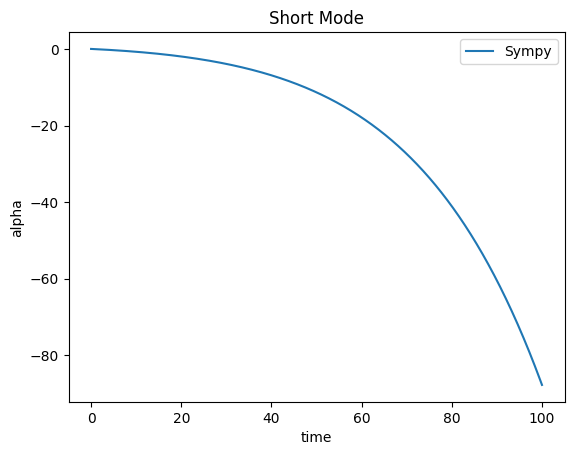

In [67]:
# Problem 5
displayVariable('\\vec{\\lambda}',Matrix(A4_eignvectors))
short_period_eign_vector = A4_eignvectors.T[0].real
displayVariable('x_0',Matrix(short_period_eign_vector))
dot_x0 = A4 @ short_period_eign_vector
displayVariable('\\dot{x}_0',Matrix(dot_x0))
def StateSpaceODE(time,combined_vector):
  x = combined_vector[0:4]
  x_dot = A4 @ x
  new_combined_vector = np.hstack((x,x_dot))
  return new_combined_vector
intial_combined_vector = np.hstack((short_period_eign_vector,dot_x0))
numerical_solution = scipy.integrate.solve_ivp(StateSpaceODE,(0,100),intial_combined_vector,method='RK45')

eta,t,omega,C1,C2 = symbols('\\eta t \\omega C_1 C_2')
alpha_of_t = sp.exp(eta*t)*(C1*sp.cos(omega*t)+C2*sp.sin(omega*t))
alpha_of_t = alpha_of_t
alpha_dot_of_t = alpha_of_t.diff(t)
displayVariable('\\alpha(t)',alpha_of_t)
displayVariable('\\dot{\\alpha}(t)',alpha_dot_of_t)
eqn1 = alpha_of_t.subs({eta:A4_eignvectors.T[0][1].real,omega:A4_eignvectors.T[0][1].imag,t:0}) - short_period_eign_vector[1]
eqn2 = alpha_dot_of_t.subs({eta:A4_eignvectors.T[0][1].real,omega:A4_eignvectors.T[0][1].imag,t:0}) - dot_x0[1]
C1_solution,C2_solution = next(iter(sp.nonlinsolve([eqn1,eqn2],[C1,C2])))
displayVariable('C_1',C1_solution)
displayVariable('C_2',C2_solution)
alpha_of_t = sp.lambdify(t,alpha_of_t.subs({eta:A4_eignvectors.T[0][1].real,omega:A4_eignvectors.T[0][1].imag,C1:C1_solution,C2:C2_solution}))
timespace = np.linspace(0,100,1000)
plt.plot(timespace,alpha_of_t(timespace),label='Sympy')
# plt.plot(timespace,numerical_solution.y[1],label='Scipy')
plt.title('Short Mode')
plt.xlabel('time')
plt.ylabel('alpha')
plt.legend()
plt.show()